#**Taréa N°2 Inteligencia Artificial**
- *Estudiante: Joaquín Fernández.* 
- *Profesor: Martín Gutiérrez.*
- *Ayudante: Nicolás Araya.*

Para esta taréa se solicita implementar soluciones a los siguientes problemas.

# Pregunta 1
El presidente de Icrania, Rodolfo Zulensky está escapando de las manos de los grusos, quienes han invadido el país. De hecho, los grusos han cercado la ciudad de Guive y especialmente un cuadrante de tamaño N x N kilómetros cuadrados (donde cada kilómetro corresponde a una unidad). En esta zona además, hay soldados de la resistencia icraniana que se mueven por grupos. Estos K grupos son fijos en tamaño y buscan o bien acompañar a Zulensky o bien despistar a los grusos. Ud. es un espía de Zulensky que pasa por asesor de Plutin y sabe de inteligencia artificial. Plutin le pide que desarrolle un modelo que asista en ubicar a Zulensky para invitarle un trago... A Ud. se le ocurre que los estornudos y escopetas (Filtro de partículas) es una manera viable de estimar la ubicación de Zulensky. Ayude a Zulensky a escapar de Plutin (25 ptos).

**_Para la solución de este problema fue necesario ver el siguiente enlace:_**

- https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/particle_filters.ipynb?_x_tr_sl=auto&_x_tr_tl=en&_x_tr_hl=es#scrollTo=hOka4acHMSAh

#**Para esta solución fue necesario aplicar filtro de partículas:**
---
##_Primero que todo; ¿Qué se entiende por filtro de partículas?_
Consiste en una variante de una simulación del método de Montecarlo, que tiene como objetivo seguir la evolución de alguna variable de interés en el tiempo.

---

##_¿De qué forma se implementa en este problema?_
Con la aplicación de SLAM o también conocido como Simultaneous Localization And Mapping. De esta forma creando una gran cantidad de partículas; dichas partículas tienen la funcionalidad individual de señalar la posición o ubicación de Zolensky en Guiev y además indican otros parámetros tal es el caso de orientación y descripción de movimiento. Teniendo esto en cuenta las partículas vendrían a ser representadas por los Grusos y estos últimos vendrían a ser repartidos o dispersados en Giev. El uso de la agrupación de partículas por sector respecto a su número indica de forma más acertada la posible posición de Zulensky; es decir mientras más partículas esten ubicadas y aglomeradas sobre una parte del plano es más creible que Zolensky este ahí, caso contrario de haber en menor cantidad y no agrupadas.

---

##_Enfoque y solución:_
Cada partícula es decir, un soldado necesita de un peso, de esta forma se aplican probabilidades con valores binarios de verdadero o falso, según la tendencia de mayor o menor aglomeración de partículas, por lo que se necesita aplicar de forma proporcional la probabilidad. Como parte del desarrollo se usa la asignación numérica de $1/N$, dada una cantidad de $N$ partículas o soldados grusos; Llegando así a un modelo en donde al sumar cada partícula dentro de la probabilidad dando 1 o 100%.


Cabe hacer mención de que al añadir las partículas con sus respectivos pesos cada una formaría el modelo de distribución de proabilidad. Dando a entender que a pesar que se encuentren en un espacio cerrado distribuidas las partículas forma aleatoria, sigue siendo además un espacio o entorno continuo, de esta manera las ubicaciones y restricciones a este modelo cambian de forma dinámica dado el comportamiento de las partículas según la aletoriedad con la que están distribuidas. Si se plantea la solución en un plano cartesiando Zolenski puede moverse sobre coordenadas "x" e "y" respecto centro (0,0).

Como se da a entender del enunciado, nos interesa encontrar a Zolenski y se entrega un cantidad de "K" de partículas considerando un vector matríz de 3 columnas teniendo en cuenta las coordenadas x, y y dirección según un módulo.

Si se consideran más factores como otras dimensiones es necesario añadir más columnas la matríz siendo así más exacto y a la vez más complejo el modelo.

---


In [1]:
!pip install filterpy
!pip install scikit-learn
import matplotlib.pyplot as plt
import numpy as np
import random
from numpy.random import uniform

In [2]:
def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    return particles

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    return particles

create_uniform_particles((0,1), (0,1), (0, np.pi*2), 4)

array([[0.44476352, 0.90241955, 2.58222831],
       [0.64551702, 0.43596622, 4.08947176],
       [0.93129367, 0.57528582, 1.59756344],
       [0.67744504, 0.95298009, 2.37594399]])

El script anterior tiene la funcionalidad de crear una distribución uniforme y gaussiana de partículas respecto a una región. 

---
#**La Predicción**:
Esta propiedad va de la mano con lo visto en Bayes, orientado en la creencia del estado del sistema. Cabe hacer mención que es necesario considerar el ruido, el desplazamiento y la dirección de las partículas. De esta forma aplicaría para su posicionamiento en un plano Cartesiano considerando el entorno como lo es el movimiento y el ruido.



In [3]:
def predict(particles, u, std, dt=1.0):
    N = len(particles)
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi
    
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist

---
#**Actualización:**
Los valores por los que pasa cada partícula es decir su peso deben de cambiar, a través de una nueva asiganción de peso; De esta forma sontituyen a un modelo de proabilidad contribuyendo cada una a una parte entera, es decir la probabilidad total sea igual a 1. 
Para visualizar de mejor manera esto es necsario usar la sguiente fórmula de Bayes.
$$P(x/y) = \frac{P(y/x)⋅P(x)}{P(y)}$$ 





In [17]:
def update(particles, weights, z, R, landmarks):
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      
    weights /= sum(weights) 

---
#**Estimación del estado**
La estimación tiene la funcionalidad ligada a la actualización, puesto que los datos tiene también el comportamiento de ser unimodales esto dada la posición de Zolensky, se puede reflejar lo anterior con la siguiente expresión:

$$μ = \frac{1}{n} ⋅ \sum^{n}_{i=1} w^{i} ⋅ x^{i} $$

In [18]:
def estimate(particles, weights):

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

---
#**Resampling (Remuestreo):**
La acción de remuestreo debe de ocurrir puesto que las partículas cambian a medida que el sistema mantiene su actividad y/o movimiento similar a una degeneración en las partículas. De esta forma el peso de las partículas y asi mismo la partícula tendrá menos importancia para el modelo por lo que no tendría relevancia al momento de efectuar la estimación. De esta manera es necesario determinar un modelo para quitar las partículas que se encuentran sobrando por lo que se efectua el siguiente modelo que adecua el entorno.
$$\hat{N}_{eff} = \frac{1}{\sum w^2}$$
La expresión anterior se aplica en la siguiente función (neff (21)) para hacer así comparaciones entre un rango aceptable para uso o no de la partícula.

In [19]:
particles = create_uniform_particles((0,1), (0,1), (0, 5), 1000)
weights = np.array([.25]*1000)
estimate(particles, weights)

(array([0.52745447, 0.50461245]), array([0.08505014, 0.08186884]))

In [20]:
def simple_resample(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1.
    indexes = np.searchsorted(cumulative_sum, random(N))

    particles[:] = particles[indexes]
    weights.fill(1.0 / N)

In [21]:
def neff(weights):
    return 1. / np.sum(np.square(weights))

Por último es neesario aplicar un remuestreo a través de indices. Pesto que son de ayuda identificar la partícula y así desplazarse por sobre todas y aplicar el remuestro respecto a su peso.

In [22]:
def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill(1.0 / len(weights))

---
#**Aplicación de plot y filtro de partículas:**
Para la aplicación del algorítmo se consideraran una serie de pasos:

*   Comenzar la distribución en un ambiente con partículas y generar así multiples de estas para una visualización más completa del plano.

*   Seguir con el cálulo de probabilidad para cada partícula según su peso y credibilidad según posibles observaciones.

*   Aplicar pesos de forma uniforme sobre cada partícula y distribución de puntos para luego obtener una nueva posible ubicación de Zolenski dado el desplazamiento de las partículas.  

*   Considerar el ruido para cada partícula.

*   A través del resampling visualizar los posibles cambios en el modelo de filtro de partículas considerando degeneración y evolución sobre este mismo.

*   Visualización con ejemplos según distintos parámetros.


Error de posición Final, varianza:
	 [-0.10621456  0.1061402 ] [0.00859646 0.00757081]


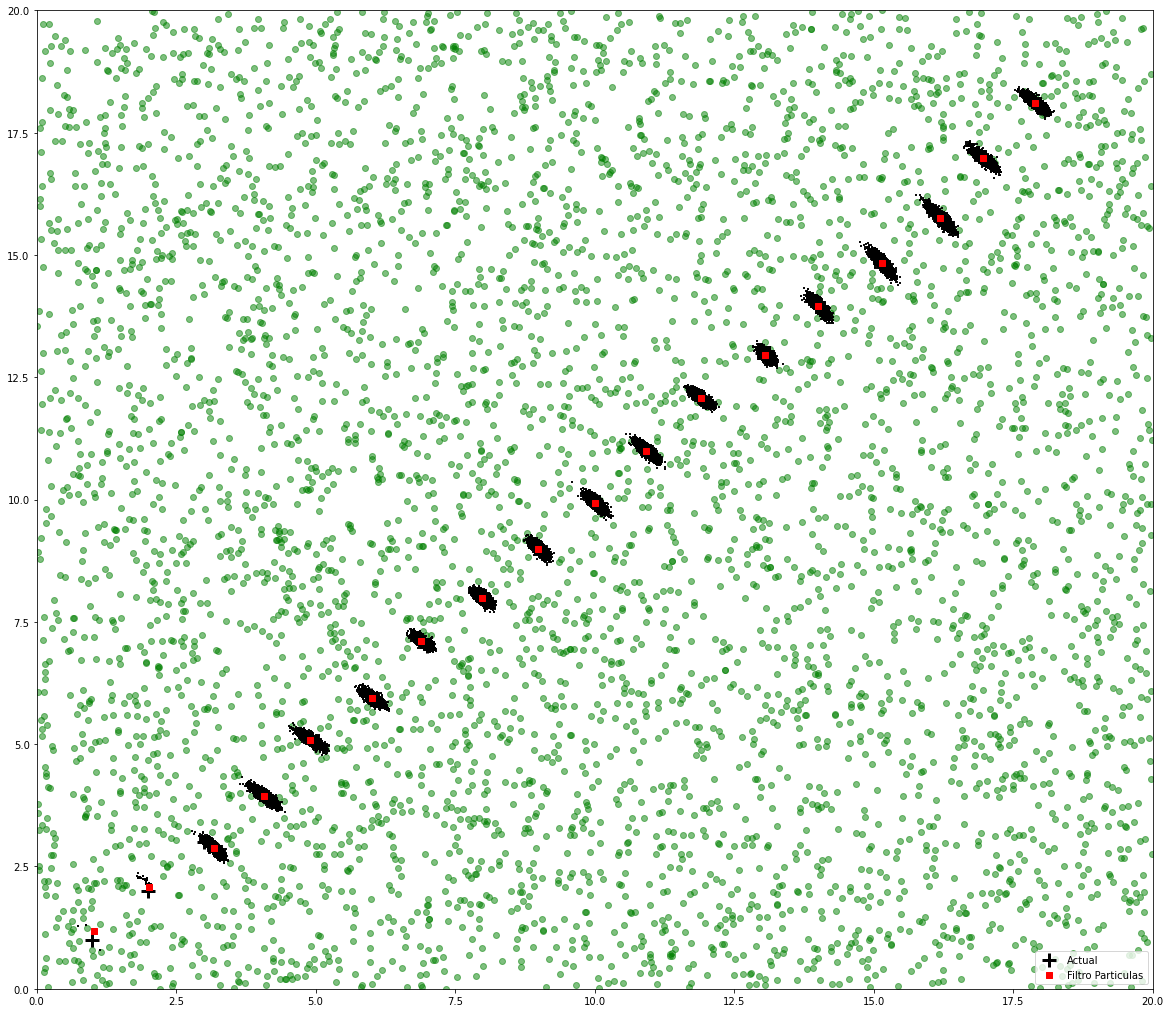

In [61]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
import scipy.stats



def run_pf1(N, iters=18, sensor_std_err=.1, 
            do_plot=True, plot_particles=False,
            xlim=(0, 20), ylim=(0, 20),
            initial_x=None):
    landmarks = np.array([[-1, 2], [5, 10], [12,14], [18,21]])
    NL = len(landmarks)
    
    plt.figure(figsize=(20,18))
   
    # Se crean las partículas con sus respectivos pesos
    if initial_x is not None:
        particles = create_gaussian_particles(
            mean=initial_x, std=(5, 5, np.pi/4), N=N)
    else:
        particles = create_uniform_particles((0,20), (0,20), (0, 6.28), N)
    weights = np.ones(N) / N

    if plot_particles:
        alpha = 0.50
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], 
                    alpha=alpha, color='g')
    
    xs = []
    zulensky_pos = np.array([0., 0.])
    for x in range(iters):
        zulensky_pos += (1, 1)

        # la distancia de zulenski respecto a cada punto de referencia
        zs = (norm(landmarks - zulensky_pos, axis=1) + (randn(NL) * sensor_std_err))

        # se mueve diagonalmente hacia adelante (x+1, x+1)
        predict(particles, u=(0.00, 1.414), std=(.2, .05))
        
        # se genera una actualización de las métricas
        update(particles, weights, z=zs, R=sensor_std_err, landmarks=landmarks)
        
        # volver a muestrear si hay muy pocas partículas efectivas
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)
            assert np.allclose(weights, 1/N)
        mu, var = estimate(particles, weights)
        xs.append(mu)

        

        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1],color='k', marker=',', s=1)
        p1 = plt.scatter(zulensky_pos[0], zulensky_pos[1], marker='+',color='k', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
    
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    plt.legend([p1, p2], ['Actual', 'Filtro Particulas'], loc=4, numpoints=1)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    print('Error de posición Final, varianza:\n\t', mu - np.array([iters, iters]), var)
    plt.show()

from numpy.random import seed
seed(2) 
run_pf1(N=5000, plot_particles=True)

Error de posición Final, varianza:
	 [-0.01868509 -0.00526306] [0.00515279 0.00559609]


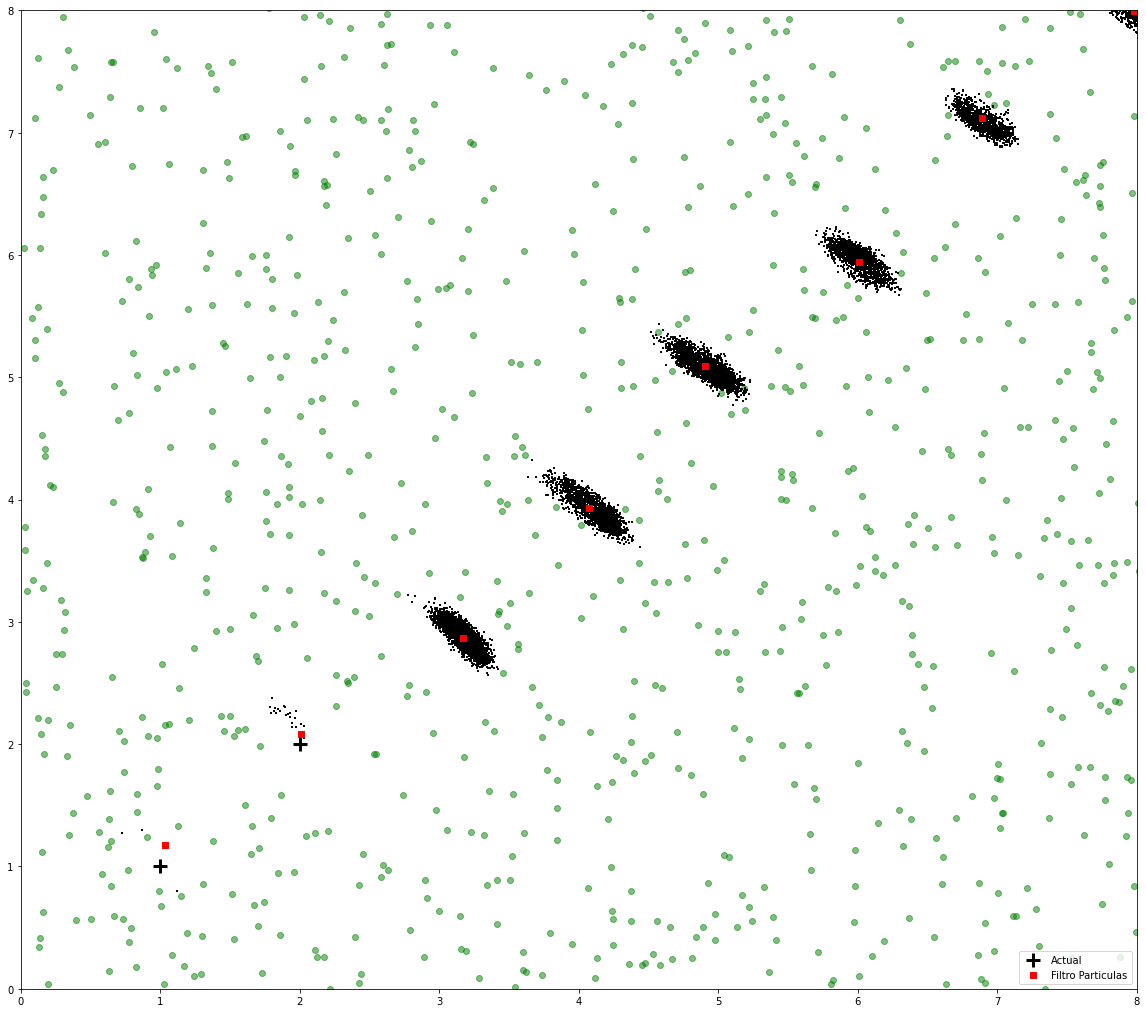

In [56]:
seed(2)
run_pf1(N=5000, iters=8, plot_particles=True, xlim=(0,8), ylim=(0,8))

Error de posición Final, varianza:
	 [ -2.68752498 -31.47031509] [47.06523888 47.03048468]


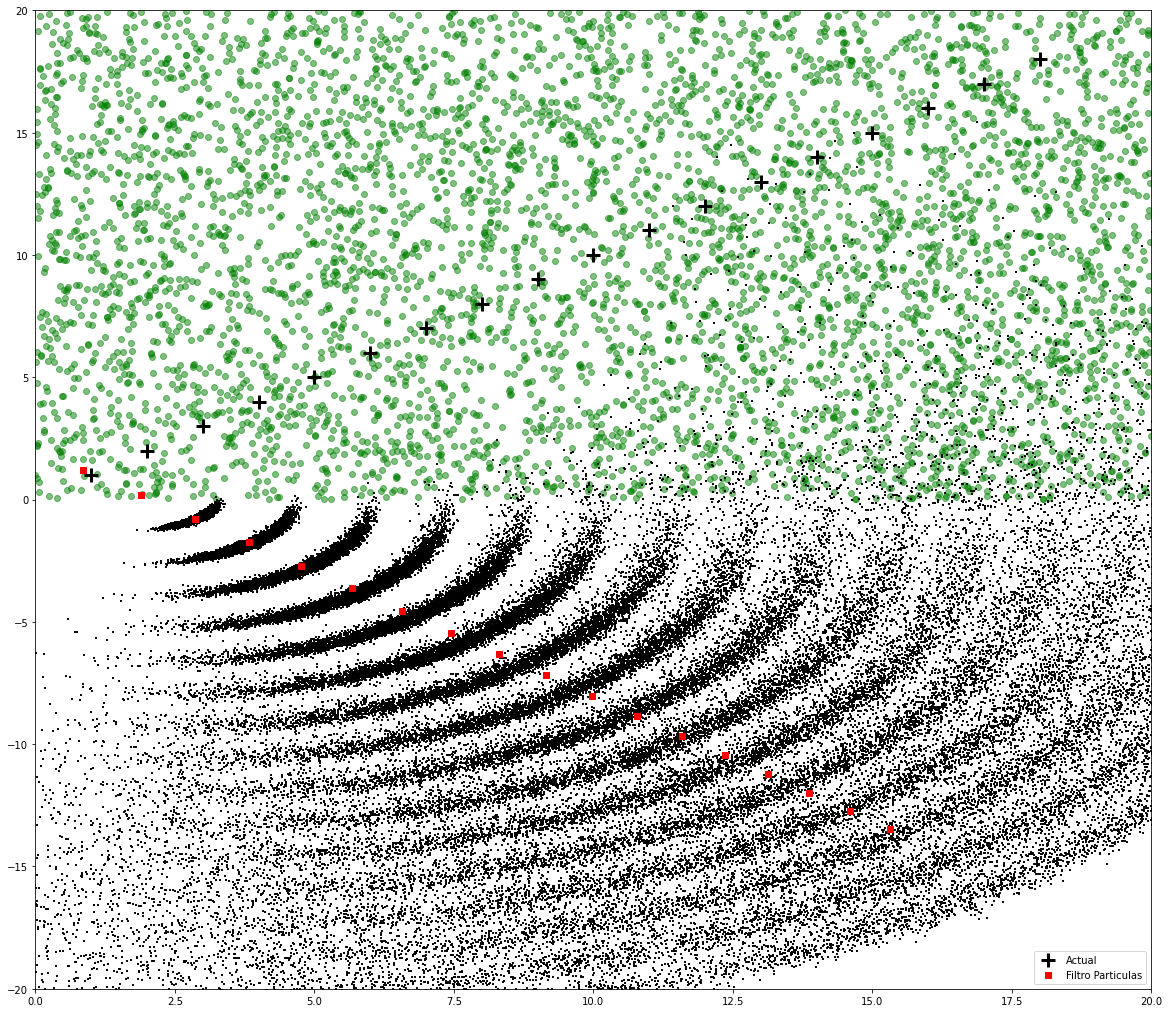

In [62]:
seed(6) 
run_pf1(N=5000, plot_particles=True, ylim=(-20, 20))

---
##**Conclusiones**:
Puede verse una mayor algomeración y ala vez dispersión de las partículas esto es esperado ya que si se considera el hecho de que Zulensi va caminando en una sola dirección pero no quita que la acumulación de partículas sgún su localidad y referencia son de ayuda para ubicar a Zolenski, a pesar de que no deje de forma explicita su ubicación debido a la dispersión, es una medida que agiliza los resultados de búsqueda.

#Pregunta 2
Krutos, dios de la gorra vegana, es un asesino de vegetales... en beneficio del mundo, puesto que arma ensaladas de los cuerpos de los caídos. Es imperativo que Krutos conozca bien las proporciones de sus actos. Es decir, debe hacer ensaladas balanceadas. Los enemigos de Krutos incluyen las temibles zanahorias, las omnipresentes lechugas, los astutos brócolis y los vergonzosos tomates. Cada uno de estos enemigos se caracteriza por la cantidad de calorías que aporta, su masa y la cantidad de agua que lo conforma. Además, como Krutos es un brígido, se enfrenta a 1000 de estos tipos. Ayude a Krutos a decidir cómo proceder en su faena identificando dónde está cada grupo de enemigos genere Ud. los 1000 datos) (aleatorios).

Para realizar este problema fue util seguir los siguientes extractos:


*  https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html 
*   https://www.youtube.com/watch?v=WsGNJYCxwNM



---
##**Uso de Dataset:**
Se genera el dataset con las 1000 verduras, según medidas asociadas como lo son las escalas de calorias de tomates, su nivel de agua y masa. Además se da uso de diferentes librerias para el uso de gráficas y/o herramientas para la fomación de cada cluster. 

---
##*¿Qué se debe de utilzar?*
EM a través de GMM, puesto que se tiene en cuenta el algorítmo de K-Means, el cual tiene la particularidad de generar clusters con una probabilidad respectiva. Además incluye una dependencia de la covarianza facilitando la probabilidad en múltiples dimensiones.

---
##¿De qué forma utilizarlo en el problema?
Se tienen 4 tipos de verduras para generar el dataset de 1000 datos estos son Lechuga, Tomates, Zanahoria y Brócoli. Estos últimos vendrían a ser los clusters.
De esta forma lo que se busca es clasificar a cada uno de los vegetales respecto a las columnas o variables que la componen, es decir las ya mencionadas en el parrafo anterior.

In [77]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.mixture import *

from sklearn.metrics import silhouette_score

%matplotlib inline

In [78]:
import pandas as pd

df = pd.read_csv("datos.csv",encoding='latin1', delimiter=',')
df.head()
df.describe()

,calories,nivel-agua,masa
count,1000.000000,1000.000000,1000.000000
mean,29.139000,91.593000,9.892000
std,13.457667,11.245702,4.187346
min,8.000000,70.000000,4.000000
25%,19.000000,82.000000,6.000000
50%,28.000000,91.000000,9.000000
75%,41.000000,101.000000,13.000000
max,51.000000,115.000000,19.000000


##**Gráficas y Scripts:**
Las gráficas pertenecen a partes de suma importancia en GMM, de esta forma se considera lo que vendría a ser la covarianza y la dispersión. De esta forma fue necesario considerar multiples dimensiones ya que al ser 3 variables a tratar vendrían a ser 6 gráficas en donde 3 de estas si se considera la covarianza en elpises y en las primeras tres no. 

Ahora vendría a ser necesario explicar los bloques para generar las gráficas.

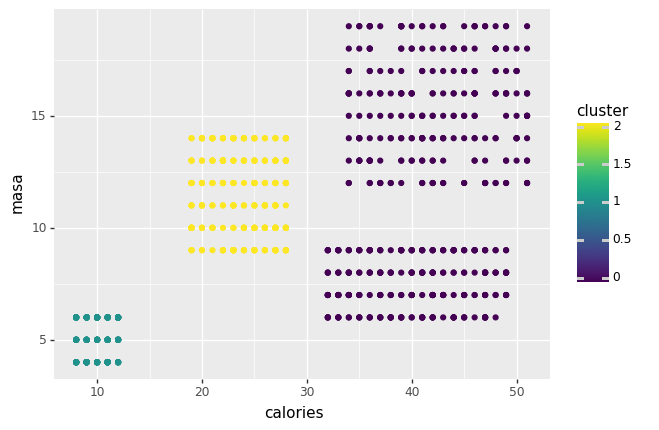

<ggplot: (8729512516249)>

In [79]:
features = ['calories','masa']

X = df[features]

z = StandardScaler()

#X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components=3)
EM.fit(X)

cluster = EM.predict(X)

# cluster_p = EM.predict_proba(X)
# cluster_p

#print("SILHOUETTE: ",silhouette_score(X,cluster))

X["cluster"] = cluster
X.head()
(ggplot(X, aes(x = "calories",y = "masa", color = "cluster")) + geom_point())

#**Visualización en Múltiples Dimensiones**

In [80]:
features = ["calories","masa","nivel-agua"]
# bk = df
X = df[features]
#z = StandardScaler()
#X[features] = z.fit_transform(X)

In [81]:
EM = GaussianMixture(n_components=4).fit(X)
EM.fit(X)

GaussianMixture(n_components=4)

In [82]:
cluster = EM.predict(X)
#cluster

In [58]:
#silhouette_score(X, cluster)

0.3963164123875282

In [96]:
# EM.predict_proba(X)

In [83]:
X['cluster'] = cluster

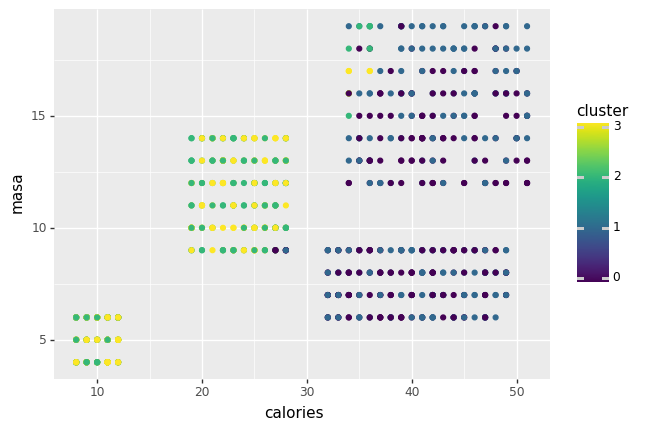

<ggplot: (8729513109333)>

In [84]:
(ggplot(X, aes(x = "calories",y = "masa", color = 'cluster')) + geom_point())

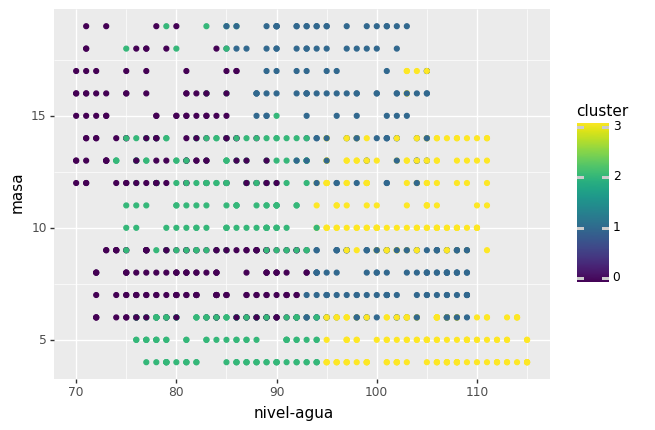

<ggplot: (8729515297509)>

In [85]:
(ggplot(X, aes(x = "nivel-agua",y = "masa", color = 'cluster')) + geom_point())

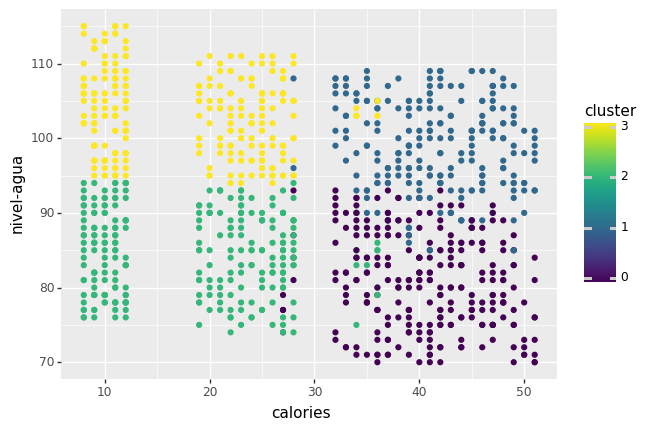

<ggplot: (8729513191421)>

In [86]:
(ggplot(X, aes(x = "calories",y = "nivel-agua", color = 'cluster')) + geom_point())

Para realizar las gráficas de las elipses es necesario considerar datos importante como lo son el ángulo dado por la covarianza.

##GMM:
La función GMM tiene el rol de hacer las graficas en 3 dimensiones que existen en el modelo de distribución, siendo estas masa, calorias y agua. Por lo que se aplican gráficas respecto a 2 dimensiones; considerando así 3 gráficas y los cntroides son las zonas del gráfico que acumulan concentraciones en formas de clusters.

##ElipseGenerator:
Dicha función tiene la particularidad de generar las elipses las cuales será de ayuda para describir la categorización de cada verdura en el plano. De esta forma se podría vsualizar una hiperesfera que se encarga de resolver la probabilidad esto facilitándolo con el ángulo otorgado por la covarianza. De esta forma se puede dar con la ubicación o posicionamiento del cluster de la agrupación de datos.  

Para efectuar la gráfica de la elipse fue necesario usar de la documentación de esta forma se dio con usar el ángulo, este último siendo entregado por la covarianza, de esta forma por cada porbabilidad dada por la verdura el angulo cambia aunque no sea de forma muy efectiva la posibilidad de ver una hiperesfera.

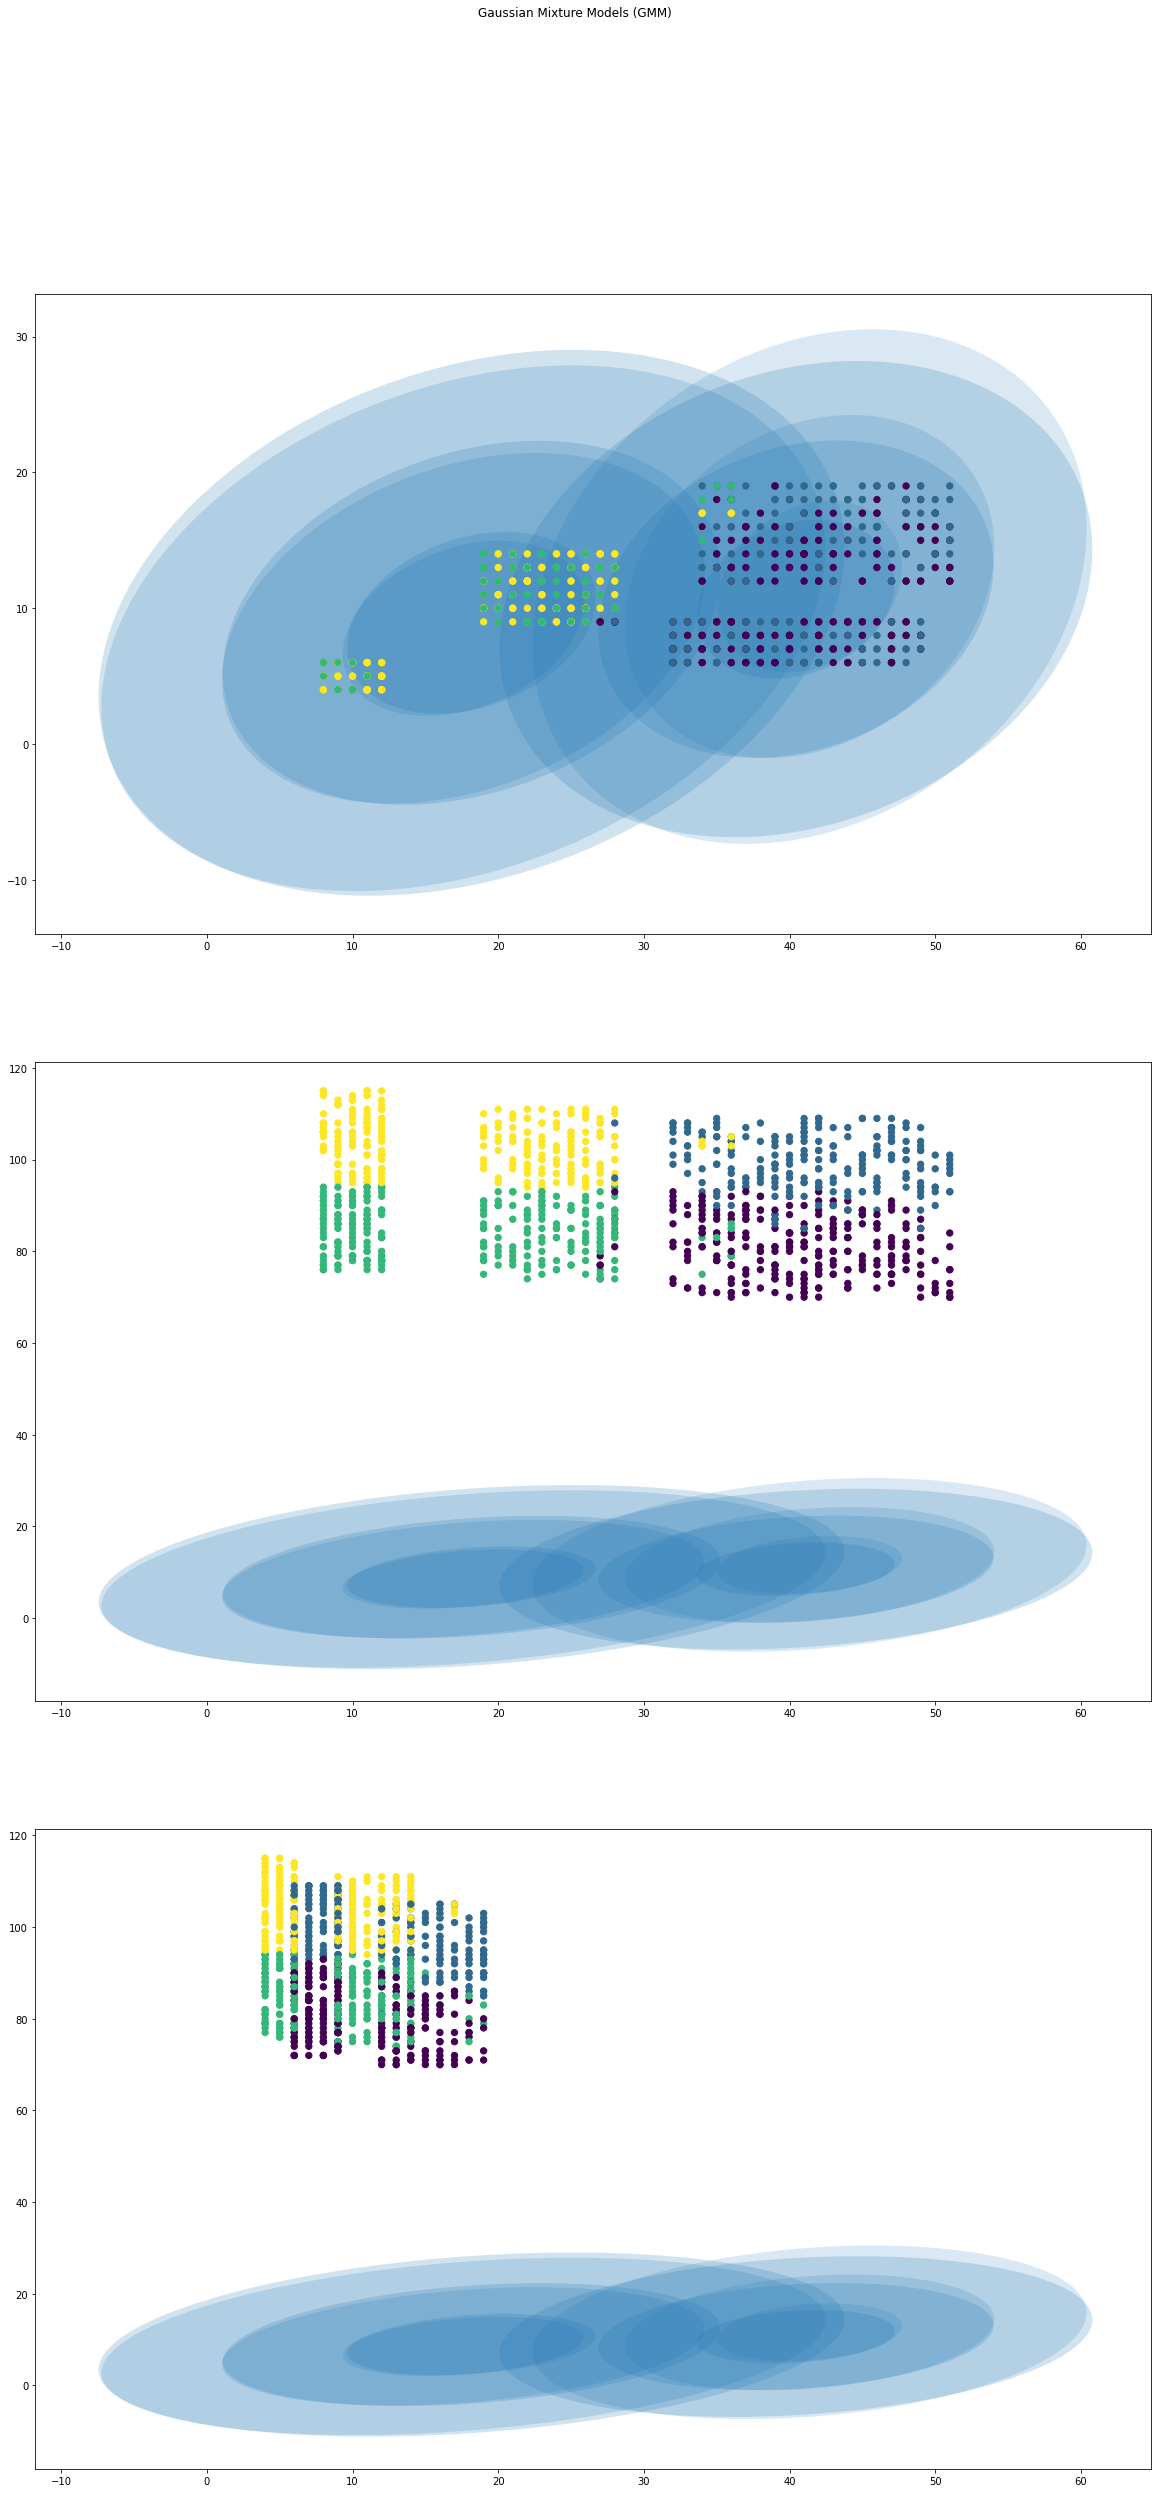

In [88]:
'''Script extraido de la documentación vista en GMM parra verla de forma directa se recomienda ver el enunciado del problema 2 escrito más arriba'''
# Libreria que se encarga de traer de matplotlib las elipses y otros
from matplotlib.patches import *

# Función que se encarga de generar la distribución de probabilidad
def GMM(gmm, data):
  fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,40))
  fig.suptitle('Gaussian Mixture Models (GMM)')
  
  w_factor = 0.2 / gmm.weights_.max()

  # calorias vs nivel-agua
  ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, 3], s=40, zorder=2)
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    ElipseGenerator(pos, covar, alpha=w * w_factor, ax=ax1)

  #------------------------------------o------------------------------------

  # masa vs nivel-agua
  ax2.scatter(data.iloc[:, 0], data.iloc[:, 2], c=data.iloc[:, 3], s=40, zorder=2)
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    ElipseGenerator(pos, covar, alpha=w * w_factor, ax=ax2)

  #------------------------------------o------------------------------------

  # calorias vs masa
  ax3.scatter(data.iloc[:, 1], data.iloc[:, 2], c=data.iloc[:, 3], s=40, zorder=2)
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    ElipseGenerator(pos, covar, alpha=w * w_factor, ax=ax3)

# Funcion que se encarga de crear las elipses.
def ElipseGenerator(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    # Aplicación de covarianza como angulo de referencia para la creación de la elipse.
    if covariance.shape == (3, 3):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height, large = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    #------------------------------------o------------------------------------

    # Ciclo que se encarga de crear de forma iterativa las graficas con las elipses.
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))

GMM(EM, X)

---
##**Conclusiones:**
Con las gráficas ahora se pueden visualizar las posibles ubicaciones de las verduras según cada cluster.